**Aim Of The Project**

The main Objective of this project is to use the concepts of Digital image processing that we have learned in the class.In order to use those concepts we have to select a computer vision problem.
The problem that we have selected for our project is social distances and face mask detection.
So In this project we are going to build a deep learning model which can detect whether the person is wearing mask or not.Also our model will be able to detect whether people vilating social distances norm or not.
We will be using vgg19 (Deeplearning model) along with Haar cascading for building this project

**References**

In [ ]:
#Dataset:    https://www.kaggle.com/andrewmvd/face-mask-detection
#Data Preprocessing : https://towardsdatascience.com/real-time-face-mask-detector-with-tensorflow-keras-and-opencv-38b552660b64
#Vgg19 Pretrained model:  https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/

**Connect Colab and Google Drive And set the DIP_Project as Working directory **

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/DIP/DIP_Project/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/DIP/DIP_Project


**import useful Libraries**

In [ ]:
import cv2,os  #cv2 for working with images and os for working with files in thes directories
import numpy as np  #Linear algebra
from keras.utils import np_utils    #Datapreprocessing
import matplotlib.pyplot as plt     #Data Visualization
from scipy.spatial import distance  #Euclidean distance
from keras.applications.vgg19 import VGG19   #Deep learning model
from keras.applications.vgg19 import preprocess_input
from keras import Sequential      #Working with sequential model
from keras.layers import Flatten, Dense #Using Built in keras layers in DL Model
from keras.preprocessing.image import ImageDataGenerator  #Data Augmentation

**DataPreprocessing**

Balancing Size of all the images and convert to Grey scale

Author:Shehroze Sohail

In [ ]:
data_path='Face-Mask-Detection'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
            resized=cv2.resize(gray,(100, 100))
            data.append(resized)
            target.append(label_dict[category])

        except Exception:
            pass
            

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],100, 100,1))
target=np.array(target)
new_target=np_utils.to_categorical(target)

np.save('data',data)
np.save('target',new_target)
print("New Images Saved Succesfully")

New Images Saved Succesfully


Data Augmentation

Author:Farman Hasnain

In [ ]:
#Load train , test and val set
train_dir = 'Data/Face Mask Dataset/Train' #training Directory Path
test_dir = 'Data/Face Mask Dataset/Test'   #Test Directory Path
val_dir = 'Data/Face Mask Dataset/Validation' #Validation Directory Path
#Generate New Training Images from existing one Using ImageDataGenerator Module of Keras.preprocessing layer
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2,shear_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_dir,target_size=(128,128),class_mode='categorical',batch_size=32)
#Generate New Validation Images from existing one Using ImageDataGenerator Module of Keras.preprocessing layer
val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)
#Generate New Test Images from existing one Using ImageDataGenerator Module of Keras.preprocessing layer
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


Try Haar Face Cascading Model on Some images from Dataset

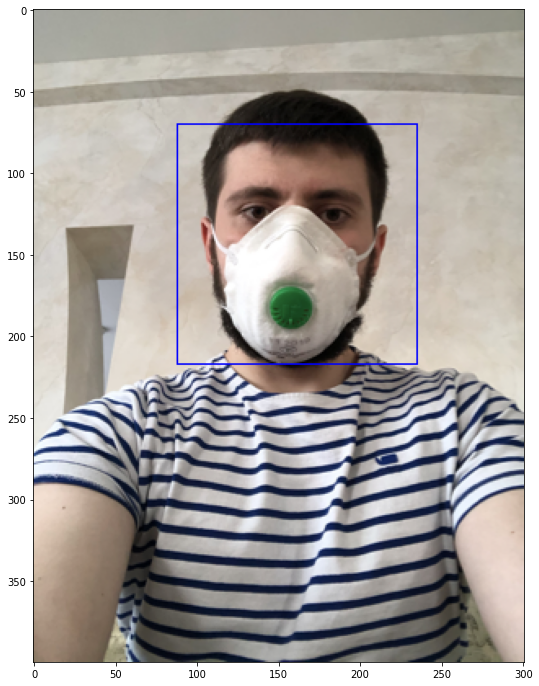

In [ ]:
#loading haarcascade_frontalface_default.xml
face_model = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
#Reading an image from dataset
img = cv2.imread('Face-Mask-Detection/images/maksssksksss243.png')
#Converting the image into GrayScale 
img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
#Load a list of (x,y,w,h) tuples Using face_model of Cascade Classifier
faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors=4) 
#Convert Resulting image into BGR
out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) 

#plotting the Resulting Image with HaarCascade
for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),1)

plt.figure(figsize=(12,12))
plt.imshow(out_img)

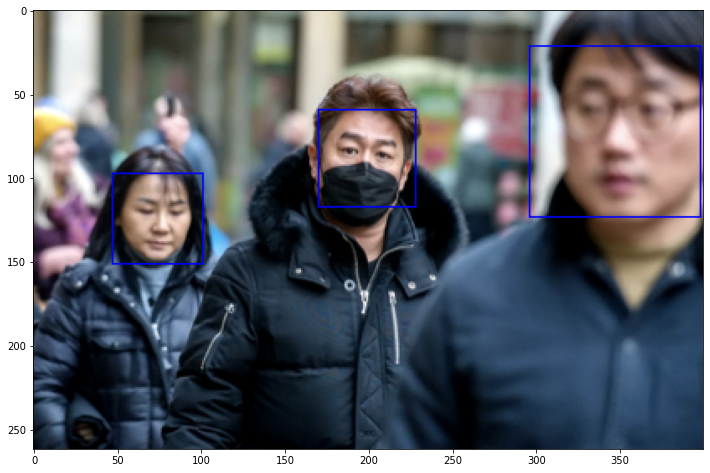

In [ ]:
#loading haarcascade_frontalface_default.xml
face_model = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
#Reading an image from dataset
img = cv2.imread('Face-Mask-Detection/images/maksssksksss244.png')
#Converting the image into GrayScale 
img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
#Load a list of (x,y,w,h) tuples Using face_model of Cascade Classifier
faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors=4) 
#Convert Resulting image into BGR
out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) 

#plotting the Resulting Image with HaarCascade
for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),1)

plt.figure(figsize=(12,12))
plt.imshow(out_img)

**Detecting social distancing violations**

**Author:Abdullah Nasir**

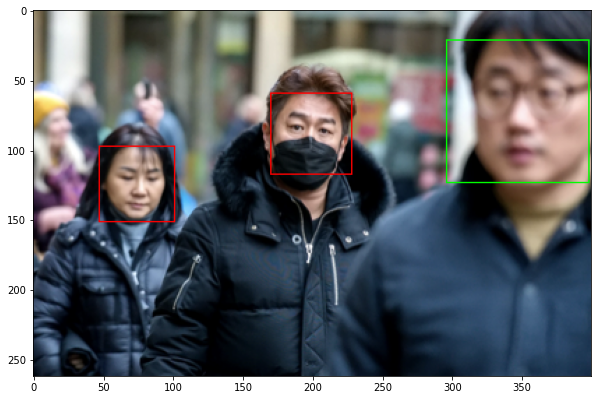

In [ ]:
#Mininimum Allowed Distance
MIN_DISTANCE = 130
if len(faces)>=2:
    label = [0 for i in range(len(faces))]
    #Iterating over the Coordinates of faces
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            #Calculate the distance for each pair
            dist = distance.euclidean(faces[i][:2],faces[j][:2])

            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
#If distance is less than Min_Distance Then Coloured the output image is Red otherwise Blue
        if label[i]==1:
            cv2.rectangle(new_img,(x,y),(x+w,y+h),(255,0,0),1)
        else:
            cv2.rectangle(new_img,(x,y),(x+w,y+h),(0,255,0),1)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)

#If image contain 1 or no image then This message is displayed            
else:
    print("No. of faces detected is less than 2")

***Build VGG19 Transfer Learning Model ***

Author:Nasir Iqbal

In [ ]:
#Load Pretrained Model Named as VGG19
vgg19 = VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))

#Freeze all the layers so that is not updated during training
for layer in vgg19.layers:
    layer.trainable = False

#Define Model Architecture    
model = Sequential()
#Add Vgg19 Layer
model.add(vgg19)
#Add Flatten LAyer
model.add(Flatten())
#Add a Dense Layer with Sigmoid activation Function
model.add(Dense(2,activation='sigmoid'))
#Display The Summary(Architecture ) of Model
model.summary()
#Use Adam Optimzer for Tuning of Hyper Parameters
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_1 (Dense)             (None, 2)                 16386     
                                                                 
Total params: 20,040,770
Trainable params: 16,386
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=len(train_generator)//32,
                              epochs=20,validation_data=val_generator,
                              validation_steps=len(val_generator)//32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/20
9/9 [==============================] - 69s 7s/step - loss: 0.6667 - accuracy: 0.6354
Epoch 2/20
9/9 [==============================] - 59s 6s/step - loss: 0.2877 - accuracy: 0.8889
Epoch 3/20
9/9 [==============================] - 60s 6s/step - loss: 0.1894 - accuracy: 0.9375
Epoch 4/20
9/9 [==============================] - 59s 6s/step - loss: 0.1949 - accuracy: 0.9132
Epoch 5/20
9/9 [==============================] - 57s 6s/step - loss: 0.1403 - accuracy: 0.9479
Epoch 6/20
9/9 [==============================] - 58s 6s/step - loss: 0.0857 - accuracy: 0.9757
Epoch 7/20
9/9 [==============================] - 57s 6s/step - loss: 0.0623 - accuracy: 0.9931
Epoch 8/20
9/9 [==============================] - 58s 6s/step - loss: 0.1256 - accuracy: 0.9549
Epoch 9/20
9/9 [==============================] - 56s 6s/step - loss: 0.0927 - accuracy: 0.9792
Epoch 10/20
9/9 [==============================] - 58s 6s/step - loss: 0.0849 - accuracy: 0.9722
Epoch 11/20
9/9 [======================

In [ ]:
#Evaluate Model on unseen Test data
model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[0.06385762989521027, 0.9787499904632568]

**Testing Model On Test Data**

Author:Nasir Iqbal

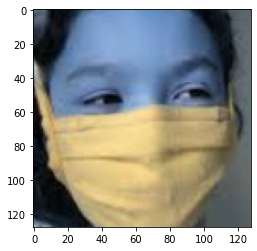

In [ ]:
#Read an image from Test dataset
sample_mask_img = cv2.imread('Data/Face Mask Dataset/Test/WithMask/1565.png')
#Change the of the image to (128,128)
sample_mask_img = cv2.resize(sample_mask_img,(128,128))
plt.imshow(sample_mask_img)
sample_mask_img = np.reshape(sample_mask_img,[1,128,128,3])
sample_mask_img = sample_mask_img/255.0

In [ ]:
#Predict whether the person is wearing the mask or not
model.predict(sample_mask_img)

array([[0.9088024 , 0.01216429]], dtype=float32)

In [ ]:
#Save the trained model
model.save('masknet.h5')

**Integrated VGG19 Model with Haar Cascade**

Author:Nasir Iqbal

In [ ]:
#Label Encoding and assigning colours to the labels
mask_label = {0:'MASK',1:'NO MASK'}
dist_label = {0:(0,255,0),1:(255,0,0)}

**Test case 1**

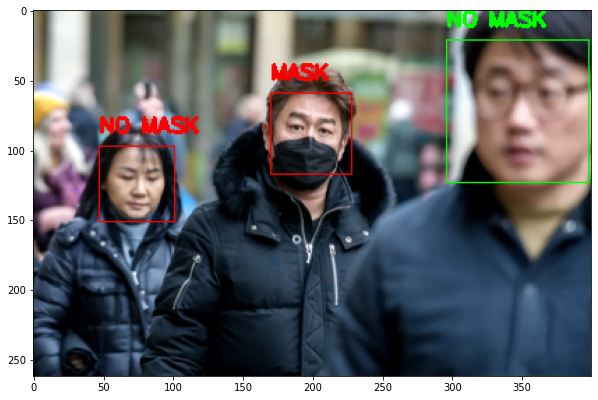

In [ ]:
if len(faces)>=2:
    label = [0 for i in range(len(faces))]
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        crop = new_img[y:y+h,x:x+w]
        crop = cv2.resize(crop,(128,128))
        crop = np.reshape(crop,[1,128,128,3])/255.0
        mask_result = model.predict(crop)
        cv2.putText(new_img,mask_label[mask_result.argmax()],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,dist_label[label[i]],2)
        cv2.rectangle(new_img,(x,y),(x+w,y+h),dist_label[label[i]],1)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)
            
else:
    print("No. of faces detected is less than 2")

**Tset Case 2**

In [ ]:
#loading haarcascade_frontalface_default.xml
face_model = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
#Reading an image from dataset
img = cv2.imread('Face-Mask-Detection/images/maksssksksss116.png')
#Converting the image into GrayScale 
img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
#Load a list of (x,y,w,h) tuples Using face_model of Cascade Classifier
faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors=4) 

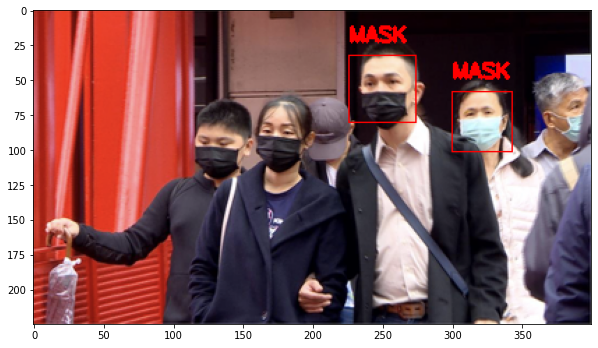

In [ ]:
if len(faces)>=2:
    label = [0 for i in range(len(faces))]
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        crop = new_img[y:y+h,x:x+w]
        crop = cv2.resize(crop,(128,128))
        crop = np.reshape(crop,[1,128,128,3])/255.0
        mask_result = model.predict(crop)
        cv2.putText(new_img,mask_label[mask_result.argmax()],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,dist_label[label[i]],2)
        cv2.rectangle(new_img,(x,y),(x+w,y+h),dist_label[label[i]],1)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)
            
else:
    print("No. of faces detected is less than 2")